<a href="https://colab.research.google.com/github/Electromayonaise/Calculus-Notebooks/blob/main/EnfriamientoNewtonED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src=http://www.acofi.edu.co/eiei2016/wp-content/uploads/2016/09/Logo-Universidad-ICESI.jpg width="300" height="200" align="center">

#**<big><big>Matemáticas Aplicadas ll</big></big><br><small>Depto. Matemáticas & Estadística / Facultad de Ingeniería</small><br><small>Jornada de Resolución de Problemas**
<b>Autores:</b>
* <b>MARTÍN GÓMEZ - A00399958</b>
* <b>ALEJANDRO QUIÑONES - A00377013</b>

#Formulación de las ecuaciones diferenciales

Definición de variables
</br>
$T(t) =$ Temperatura del objeto en el tiempo t
</br>
$T_{a} =$ Temperatura ambiente
</br>
$T'(t) =$ razón de cambio de la temperatura


Partimos de que $T'(t) = k(T(t) - T_{a})$

#Implementación Numérica

Observamos que tenemos una ecuación a la cual es posible separar las variables hacemos:
$$
T' = k(T - T_{a})\\
\frac{dT}{dt} = k(T-T_{a})\\
\frac{dT}{T-T_{a}} = kdt
$$
Ahora integramos a ambos lados y obtenemos:
$$
\int \frac{dT}{T-T_{a}} = \int kdt\\
ln|T-T_{a}| = kt + C_{1}\\
T-T_{a} = e^{kt+C_{1}}\\
T-T_{a} = e^{kt} * e^{C_{1}}\\
T-T_{a} = e^{kt} * C_{2}\\
T = T_{a} + Ce^{kt}
$$
Tenemos la que temperatura de un cuerpo en un tiempo $t$ está dada por la ecuación:
$$
T(t) = T_{a} + Ce^{kt}
$$

Comprobamos la solución anterior con el siguiente código:

In [ ]:
from sympy import symbols, Function, Eq, dsolve, exp

# Definir las variables simbólicas
t, k, C, Ta = symbols('t k C Ta')
T = Function('T')(t)

# Definir la ecuación diferencial
equation = Eq(T, Ta + C*exp(k*t))

# Resolver la ecuación diferencial
solution = dsolve(equation, T)

print(solution)

Eq(T(t), C*exp(k*t) + Ta)


Ahora suponemos que nos encontramos a una temperatura ambiente de 20°C y que la temperatura en el estado inicial es 55°C y que la temperatura después de 10min es 43°C, entonces nos queda:
$$
55 = 20 + Ce^{kt}
$$
Entonces para $t=0$ obtenemos:
$$
55 = 20+Ce^{k*0}\\
55 = 20+C\\
C = 35
$$
Ahora usando la temperatura después de 10min obtenemos:
$$
43 = 20 + 35e^{10k}\\
23 = 35e^{10k}\\
\frac{23}{35} = e^{10k}\\
ln(\frac{23}{35}) = 10k\\
\frac{ln(\frac{23}{35})}{10} = k\\
k = -0.042
$$
Entonces para este caso obtenemos que la ecuación que determina la temperatura del objeto en un tiempo $t$ es:
$$
T(t) = 20 + 35e^{-0.042t}
$$

Ahora, sabemos que el cambio de la temperatura en un intervalo de tiempo está dado por $ΔT=T-T_{a}$

##En cuanto al trabajo

Podemos decir que La integral de T(t) en un intervalo te tiempo determiando nos proporciona la cantidad de trabajo necesaria para llevar el objeto desde una temperatura inicial hasta una temperatura final, y representa la cantidad de energía transferida entre objetos (medio y objetos en este caso) en forma de calor.

$$
W = \int_{t_0}^{t_f} T(t) \, dt
$$

Sustituimos T(t)

$$ W = \int_{t_0}^{t_f} T_{a} + Ce^{kt} $$


Para resolver esta integral, primero tomemos en cuenta que \(T_a\) es una constante, y la integral de una constante con respecto a \(t\) es simplemente el producto de la constante por \(t\). Por lo tanto:

$$
\int_{t_0}^{t_f} T_a \, dt = T_a(t_f - t_0)
$$

Ahora, para la segunda parte de la integral, $Ce^{kt}$, podemos aplicar la regla básica de integración de $e^{kt}$, que es $\frac{1}{k}e^{kt}$. Entonces:

$$
\int_{t_0}^{t_f} Ce^{kt} \, dt = \left[\frac{C}{k}e^{kt}\right]_{t_0}^{t_f}
$$

Sustituyendo los límites de integración:

$$
\left[\frac{C}{k}e^{kt_f} - \frac{C}{k}e^{kt_0}\right]
$$

Finalmente, combinamos ambas partes de la integral:

$$
W = T_a(t_f - t_0) + \left[\frac{C}{k}e^{kt_f} - \frac{C}{k}e^{kt_0}\right]
$$

Esta es la expresión final para el trabajo necesario para llevar el objeto desde una temperatura inicial $T_0$ hasta una temperatura final $T_f$ en el intervalo de tiempo $[t_0, t_f]$ cuando $T(t)$ está dado por $T_a + Ce^{kt}$.




#Simulación Gráfica

In [ ]:
#@title Gráfica{ display-mode: "form" }

import IPython.display as IP

iframe = IP.IFrame(
  src="https://www.geogebra.org/classic/v2bksxmh",
  width="1020px",
  height="480px"
  )

IP.display_html(iframe)

Simulación en código, donde se pueden probar distintos valores

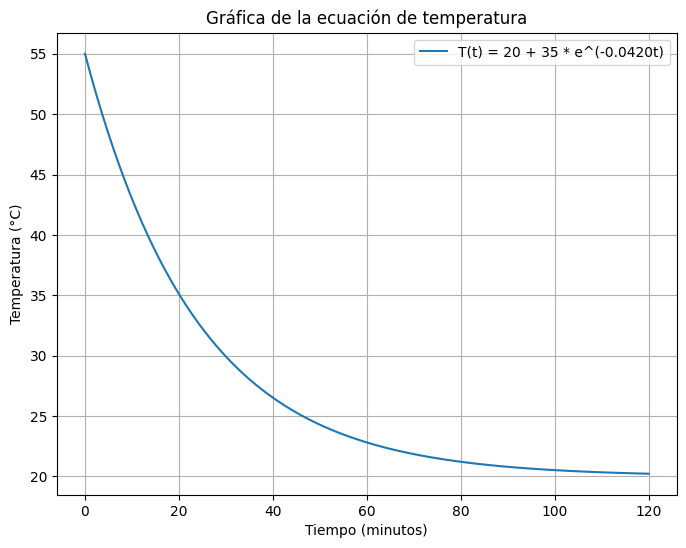

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Definir la ecuación
def temperatura(t, Ta, C, k):
    return Ta + C * np.exp(k * t)

# Ingresar los valores necesarios
Ta = 20
Ti = 55
tiempo = 10
Tf = 43

# Calcular C
C = Ti - Ta

#Calcular k
k = np.log( (Tf - Ta)/C) / tiempo

# Crear un conjunto de puntos de tiempo
t_values = np.linspace(0, 120, 100)

# Calcular los valores de temperatura correspondientes
T_values = temperatura(t_values, Ta, C, k)

# Graficar la ecuación
plt.figure(figsize=(8, 6))
plt.plot(t_values, T_values, label=f'T(t) = {Ta} + {C} * e^({k:.4f}t)')
plt.xlabel('Tiempo (minutos)')
plt.ylabel('Temperatura (°C)')
plt.title('Gráfica de la ecuación de temperatura')
plt.legend()
plt.grid(True)
plt.show()





#Análisis de Resultados

A partir de todo lo anterior:


*   El modelo describe un proceso de enfriamiento exponencial, lo que significa que la temperatura del objeto disminuye más rápidamente al principio y luego se enfría a una tasa cada vez menor a medida que se acerca a la temperatura ambiente. El objeto nunca alcanza realmente exactamente la temperatura ambiente debido a la naturaleza exponencial del proceso, pero se acerca infinitamente a ella. Es decir, cuando $t→∞$ la temperatura se estabiliza en la ambiente, se puede ver en la gráfica del ejemplo anterior, donde tiende a 20.
*   La constante k es un parámetro importante en el modelo, pues representa la rapidez con la que el objeto alcanza la temperatura ambiente. En el ejemplo expuesto, k tiene un valor de aproximadamente -0.042, lo que indica un proceso de enfriamiento relativamente lento.




